#### TASK 1:

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from scipy.stats import skew

import warnings
warnings.filterwarnings("ignore")

df = pd.read_excel("DS1_C4_S9_Car_Data (1).xlsx")
df

,S. No.,Make,Model,Variant,Displacement,Cylinders,Valves_Per_Cylinder,Fuel_Tank_Capacity_litre,Fuel_Type,Height_mm,...,Central_Locking,Child_Safety_Locks,Hill_Assist,Drive_Modes,High_Speed_Alert_System,ABS_(Anti-lock_Braking_System),Gross_Vehicle_Weight,Airbags,Door_Ajar_Warning,Fasten_Seat_Belt_Warning
0,0,Tata,Nano Genx,Xt,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Tata,Nano Genx,Xe,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Tata,Nano Genx,Emax Xm,624.0,2.0,2.0,15.0,CNG,1652.0,...,NaN,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,Tata,Nano Genx,Xta,624.0,2.0,2.0,24.0,Petrol,1652.0,...,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,Tata,Nano Genx,Xm,624.0,2.0,2.0,24.0,Petrol,1652.0,...,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,1271,Honda,City,Vx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1545 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes
1272,1272,Honda,City,Zx Mt Diesel,1498.0,4.0,4.0,40.0,Diesel,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1550 kg,"Drive side airbag, Curtain airbags, Driver fro...",Yes,Yes
1273,1273,Honda,City,Zx Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1482 kg,"Curtain airbags, Driver frontal airbag, Front ...",Yes,Yes
1274,1274,Honda,City,V Cvt Petrol,1497.0,4.0,4.0,40.0,Petrol,1495.0,...,Yes,Yes,NaN,NaN,Yes,Yes,1455 kg,"Driver frontal airbag, Front passenger frontal...",Yes,Yes


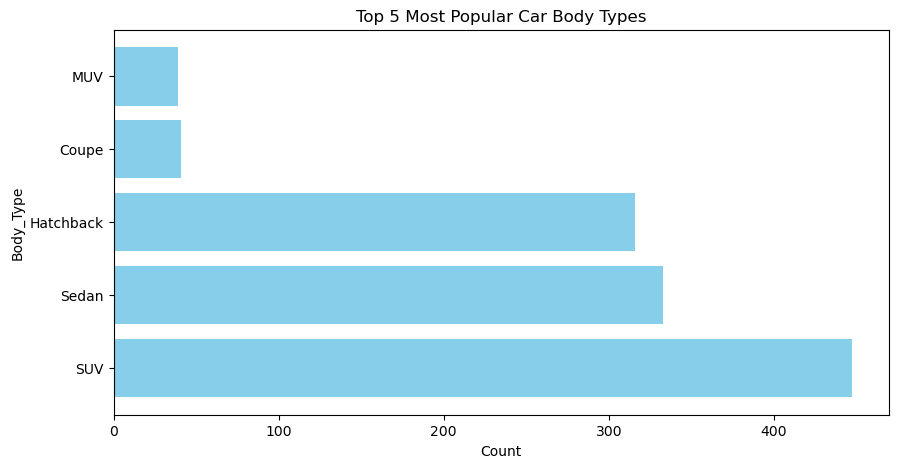

In [3]:
#Task 1

df1 = pd.DataFrame(df)

# Count the occurrences of each body type
body_type_counts = df1["Body_Type"].value_counts()

# Get the top 5 most popular body types
top_5_body_types = body_type_counts.head(5)

# Create the horizontal bar chart
plt.figure(figsize=(10, 5))
plt.barh(top_5_body_types.index, top_5_body_types.values, color="skyblue")
plt.xlabel("Count")
plt.ylabel("Body_Type")
plt.title("Top 5 Most Popular Car Body Types")
plt.show()

#### Interpretation: The top 5 most prefered body type are SUV, Sedan, Hatchback, coupe, MUV

In [29]:
#Task 2:
# Sample data of cars with their available driving modes
df1 = pd.DataFrame(df)

# List to store cars that have all required modes
required_modes = {'normal', 'comfort', 'eco', 'sport', 'power'}
cars_with_all_modes = []

# Iterate through each car to check if it has all the required modes
for car in df1:
    for car_dict in car:
        if isinstance(car_dict, dict) and 'Drive_modes' in car_dict:
            if required_modes.issubset(set(car_dict['Drive_modes'])):
                cars_with_all_modes.append(car_dict)

# Display the cars that have all the required modes
print("Cars with all driving modes (normal, comfort, eco, sport, power):")
for car in cars_with_all_modes:
    print(f"Make: {car['Make']}, Modes: {', '.join(car['Drive_modes'])}")

# Display the count of such cars
print(f"\nTotal number of cars with all modes: {len(cars_with_all_modes)}")


Cars with all driving modes (normal, comfort, eco, sport, power):

Total number of cars with all modes: 0


#### Interpretation: Their are none of the cars accomadating the above driving modes

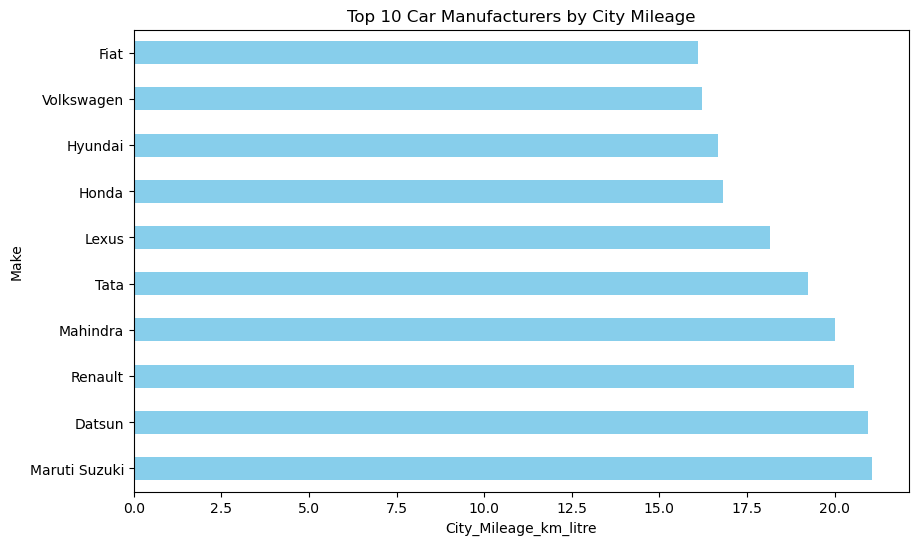

<Figure size 800x400 with 0 Axes>

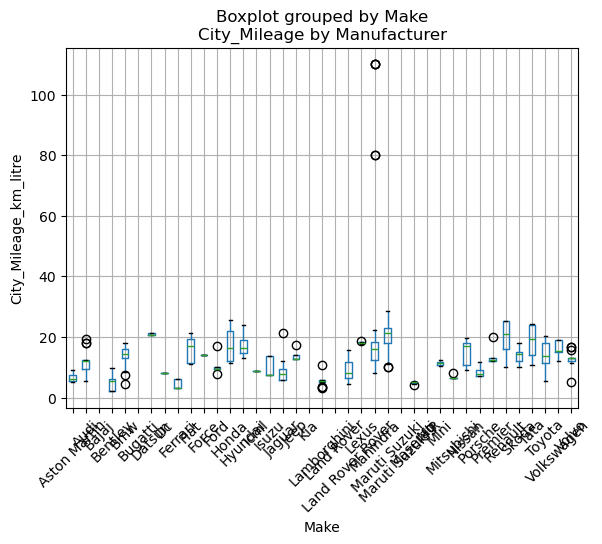

In [5]:
#Task 3:

df1 = pd.DataFrame(df)

# Group the data by manufacturer and calculate the average city mileage
grouped_data = df1.groupby('Make')['City_Mileage_km_litre'].mean().sort_values(ascending=False)

# Get the top 10 manufacturers
top_10_manufacturers = grouped_data.head(10)

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
top_10_manufacturers.plot(kind='barh', color='skyblue')
plt.xlabel('City_Mileage_km_litre')
plt.ylabel('Make')
plt.title('Top 10 Car Manufacturers by City Mileage')
plt.show()

# Identify outliers using a box plot
plt.figure(figsize=(8, 4))
df1.boxplot(column='City_Mileage_km_litre', by='Make')
plt.title('City_Mileage by Manufacturer')
plt.ylabel('City_Mileage_km_litre')
plt.xlabel('Make')
plt.xticks(rotation=45)
plt.show()

#### Interpretation: The top 10 manufacture cars are displayed by horizontal bar graph , and also their are so many outliers found

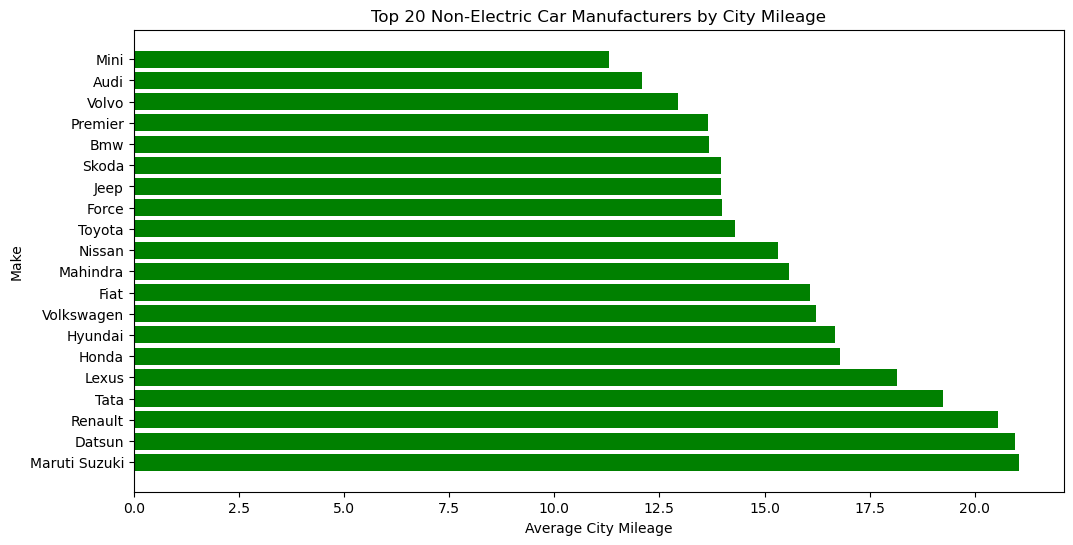

In [30]:
#Task 4:

df1 = pd.DataFrame(df)

# Filter out electric cars based on a specific column (e.g., "vehicle_type")
non_electric_cars = df1[df1["Fuel_Type"] != "Electric"]  # Replace "Electric" with your actual value

# Group by manufacturer and calculate average city mileage
avg_city_mileage = non_electric_cars.groupby("Make")["City_Mileage_km_litre"].mean()

# Get the top 20 manufacturers with highest average city mileage
top_20_manufacturers = avg_city_mileage.nlargest(20)

# Create the horizontal bar chart
plt.figure(figsize=(12, 6))
plt.barh(top_20_manufacturers.index, top_20_manufacturers.values, color="green")
plt.xlabel("Average City Mileage")
plt.ylabel("Make")
plt.title("Top 20 Non-Electric Car Manufacturers by City Mileage")
plt.show()

#### Interpretation: The top 20 cars manufacturer are displaced based on the bar graph and the maruti suzuki has the highest city milage 

In [34]:
#Task 5:

df1 = pd.DataFrame(df)

# Filter for the specified manufacturers
filtered_data = df1[df1["Make"].isin(["Hyundai", "Mahindra", "Renault", "Skoda"])]

# Create pivot tables for each metric
# 1. Mean of city mileage
mean_city_mileage = filtered_data.pivot_table(index="Make", values="City_Mileage_km_litre", aggfunc="mean")

# 2. Median of city mileage
median_city_mileage = filtered_data.pivot_table(index="Make", values="City_Mileage_km_litre", aggfunc="median")

# 3. Mean of highway mileage
mean_highway_mileage = filtered_data.pivot_table(index="Make", values="Highway_Mileage_km_litre", aggfunc="mean")

# 4. Median of highway mileage
median_highway_mileage = filtered_data.pivot_table(index="Make", values="Highway_Mileage_km_litre", aggfunc="median")

# Print the pivot tables (or display them in a more suitable format)
print("Mean of city mileage:\n", mean_city_mileage)
print("\nMedian of city mileage:\n", median_city_mileage)
print("\nMean of highway mileage:\n", mean_highway_mileage)
print("\nMedian of highway mileage:\n", median_highway_mileage)

Mean of city mileage:
           City_Mileage_km_litre
Make                           
Hyundai               16.679853
Mahindra              20.003763
Renault               20.554286
Skoda                 13.953333

Median of city mileage:
           City_Mileage_km_litre
Make                           
Hyundai                   16.38
Mahindra                  16.00
Renault                   21.04
Skoda                     14.50

Mean of highway mileage:
           Highway_Mileage_km_litre
Make                              
Hyundai                  18.294146
Mahindra                 18.140175
Renault                  17.690000
Skoda                    17.268529

Median of highway mileage:
           Highway_Mileage_km_litre
Make                              
Hyundai                      18.50
Mahindra                     17.21
Renault                      19.60
Skoda                        16.00


#### Interpretation: And the above mentioned make has the been calculated for the city milage and highway milage for their mean, median, 

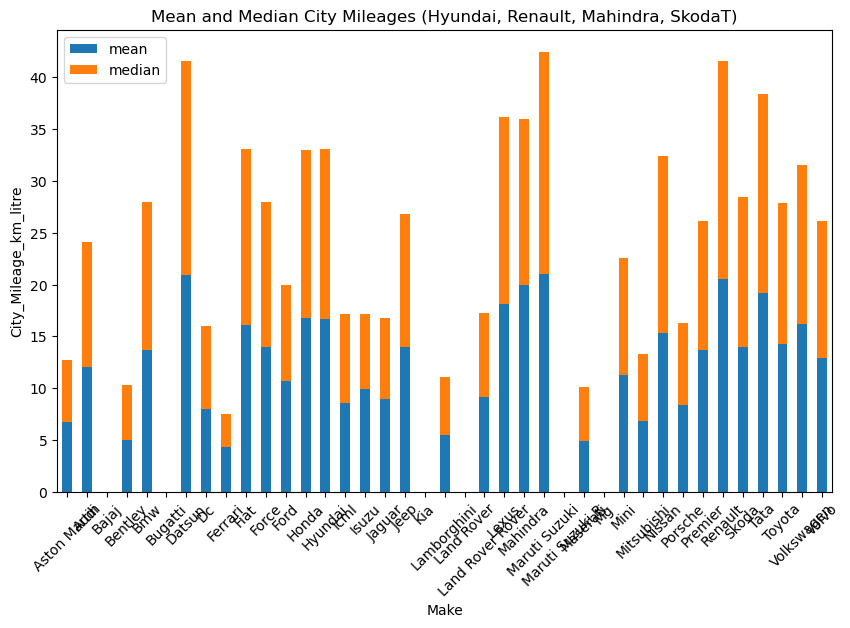

In [44]:
#Task 6:

df1 = pd.DataFrame(df)

# Filter data for the specified manufacturers
data = df1[df1['Make'].isin(['Hyundai', 'Renault', 'Mahindra', 'Skoda'])]

# Group the data by manufacturer and calculate mean and median
grouped_data = df1.groupby("Make")["City_Mileage_km_litre"].agg(["mean", "median"])

# Create a stacked column chart
grouped_data.plot(kind="bar", stacked=True, figsize=(10, 6))

# Add labels and title
plt.title("Mean and Median City Mileages (Hyundai, Renault, Mahindra, SkodaT)")
plt.xlabel("Make")
plt.ylabel("City_Mileage_km_litre")
plt.xticks(rotation=45)

plt.show()

#### Interpretation: Based on the mean and meadian of city milage the mahindra has the highest value of it

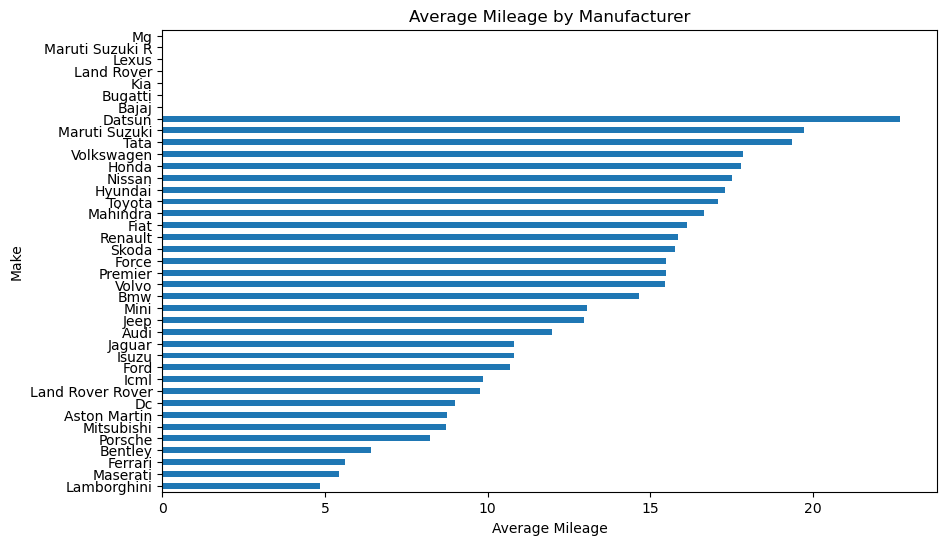

In [50]:
#Task 7:

df1 = pd.DataFrame(df)

# Calculate average mileage (city + highway) for each manufacturer
df1['Average Mileage'] = (df1['City_Mileage_km_litre'] + df1['Highway_Mileage_km_litre']) / 2

# Group by manufacturer and calculate the mean average mileage
grouped_data = df1.groupby("Make")['Average Mileage'].mean().sort_values()

# Create a horizontal bar chart
grouped_data.plot(kind="barh", figsize=(10, 6))

# Add labels and title
plt.title("Average Mileage by Manufacturer")
plt.xlabel("Average Mileage")
plt.ylabel("Make")

plt.show()

#### Interpretation: The average milage has been plotted by bar graph and the datsun has the highest average milage 

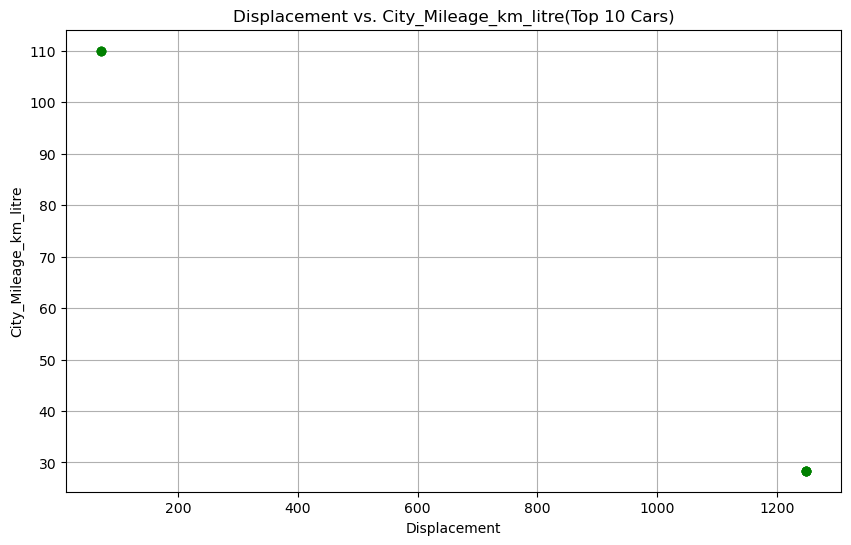

In [59]:
#Task 8:

df1 = pd.DataFrame(df)

# Filter for top 10 cars with highest city mileage
top_10_cars = df1.nlargest(10, 'City_Mileage_km_litre')

# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(top_10_cars['Displacement'], top_10_cars['City_Mileage_km_litre'], marker='o', linestyle='-', color='green')

# Add labels and title
plt.title("Displacement vs. City_Mileage_km_litre(Top 10 Cars)")
plt.xlabel("Displacement")
plt.ylabel("City_Mileage_km_litre")

# Gridlines
plt.grid(True)

plt.show()

In [ ]:
#### Interpretation: 

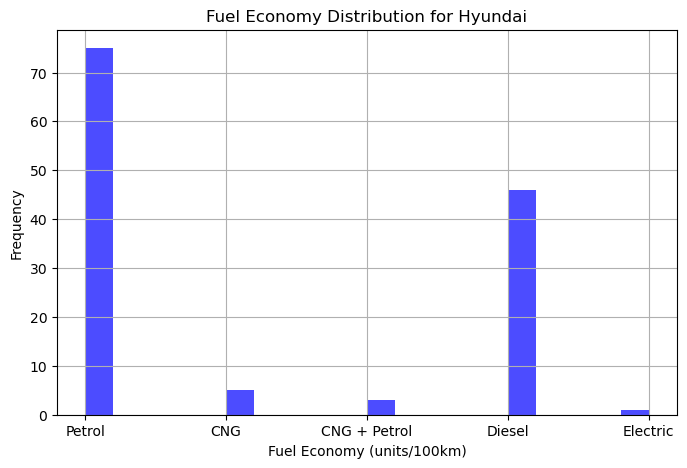

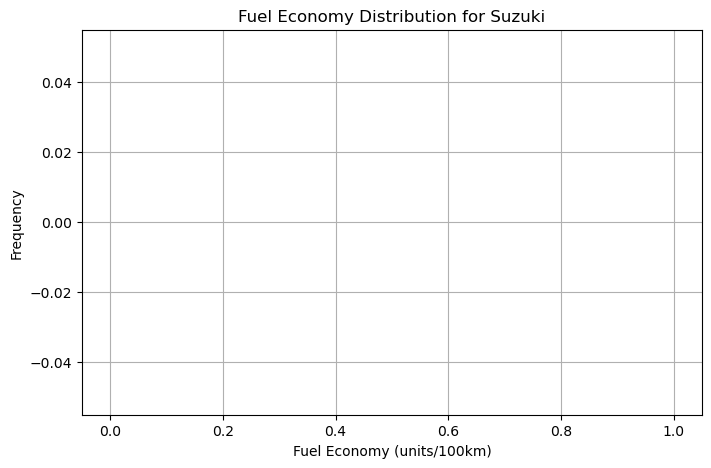

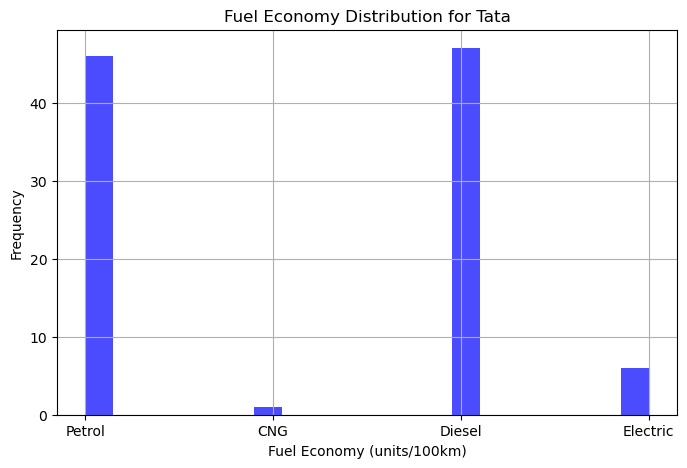

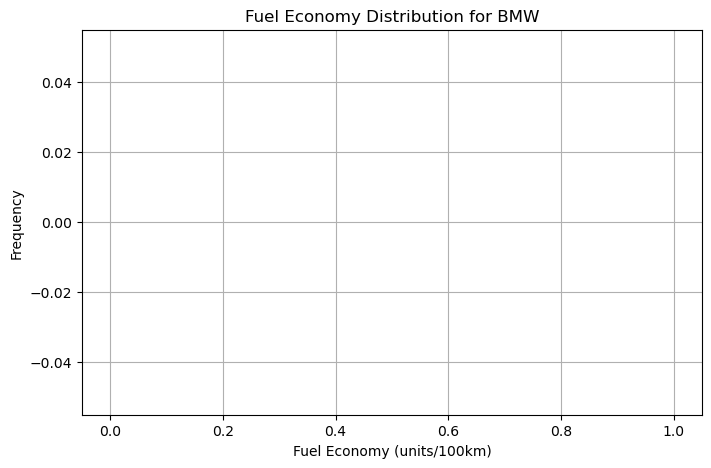

In [21]:
#Task 9:

df1 = pd.DataFrame(df)

# Filter data for the specified manufacturers
manufacturers = ['Hyundai', 'Suzuki', 'Tata', 'BMW']
filtered_data = df1[df1['Make'].isin(manufacturers)]

# Create separate histograms for each manufacturer
for manufacturer in manufacturers:
    manufacturer_data = filtered_data[filtered_data['Make'] == manufacturer]
    plt.figure(figsize=(8, 5))
    plt.hist(manufacturer_data['Fuel_Type'], bins=20, color='blue', alpha=0.7)
    plt.title(f"Fuel Economy Distribution for {manufacturer}")
    plt.xlabel("Fuel Economy (units/100km)")
    plt.ylabel("Frequency")
    plt.grid(True)
    plt.show()

    # Calculate skewness
    # Replace non-numerical values with NaN (Not a Number)
    manufacturer_data['Fuel_Type'] = pd.to_numeric(manufacturer_data['Fuel_Type'], errors='coerce')

    # Calculate skewness, ignoring NaN values
    skewness = skew(manufacturer_data['Fuel_Type'].dropna())

#### Interpretation: The fuel ecenomy distribution is more for the petrol in case of hyundai, and diesel is more in tata 

In [25]:
#Task 10:

df1 = pd.DataFrame(df)

# Select the desired columns
new_df = df1[['Valves_Per_Cylinder', 'Kerb_Weight', 'Make', 'Displacement', 'Fuel_Tank_Capacity_litre', 'City_Mileage_km_litre', 'Highway_Mileage_km_litre', 'Power', 'Torque', 'Gross_Vehicle_Weight']]

# Check for missing values
print(new_df.isnull().sum())

# Handle missing values (replace with appropriate values or remove rows)
# Example: Replace missing values in 'City_Mileage_km_litre' with the mean
new_df['City_Mileage_km_litre'].fillna(new_df['City_Mileage_km_litre'].mean(), inplace=True)

# Remove rows with missing values in 'Gross_Vehicle_Weight'
new_df.dropna(subset=['Gross_Vehicle_Weight'], inplace=True)

# Print the cleaned DataFrame
print(new_df)

Valves_Per_Cylinder         102
Kerb_Weight                 365
Make                         75
Displacement                 12
Fuel_Tank_Capacity_litre     69
City_Mileage_km_litre       555
Highway_Mileage_km_litre    800
Power                         0
Torque                        2
Gross_Vehicle_Weight        595
dtype: int64
      Valves_Per_Cylinder Kerb_Weight           Make  Displacement  \
24                    4.0      920 kg  Maruti Suzuki        1196.0   
25                    4.0      940 kg  Maruti Suzuki        1196.0   
26                    4.0      928 kg  Maruti Suzuki        1196.0   
27                    4.0     1050 kg  Maruti Suzuki        1196.0   
28                    4.0     1030 kg  Maruti Suzuki        1196.0   
...                   ...         ...            ...           ...   
1271                  4.0     1170 kg          Honda        1498.0   
1272                  4.0     1175 kg          Honda        1498.0   
1273                  4.0     1107 kg

#### Interpretation:  The following columns are listed in and missing values are identified and the missing value treatment is performed

In [37]:
#Task 11:

df1 = pd.DataFrame(df)
import re

# Preprocess Kerb_Weight
new_df['Kerb_Weight'] = new_df['Kerb_Weight'].replace('kg', '', regex=False)
new_df['Kerb_Weight'] = pd.to_numeric(new_df['Kerb_Weight'])
new_df['Kerb_Weight_pounds'] = new_df['Kerb_Weight'] * 2.2

# Preprocess Gross_Vehicle_Weight
new_df['Gross_Vehicle_Weight'] = new_df['Gross_Vehicle_Weight'].str.replace(r"[^\d\-kg]", "", regex=True)
new_df['Gross_Vehicle_Weight'] = pd.to_numeric(new_df['Gross_Vehicle_Weight'])
new_df['Gross_Vehicle_Weight_pounds'] = new_df['Gross_Vehicle_Weight'] * 2.2

# Print the modified DataFrame
print(new_df)

      Valves_Per_Cylinder  Kerb_Weight           Make  Displacement  \
24                    4.0        920.0  Maruti Suzuki        1196.0   
25                    4.0        940.0  Maruti Suzuki        1196.0   
26                    4.0        928.0  Maruti Suzuki        1196.0   
27                    4.0       1050.0  Maruti Suzuki        1196.0   
28                    4.0       1030.0  Maruti Suzuki        1196.0   
...                   ...          ...            ...           ...   
1271                  4.0       1170.0          Honda        1498.0   
1272                  4.0       1175.0          Honda        1498.0   
1273                  4.0       1107.0          Honda        1497.0   
1274                  4.0       1080.0          Honda        1497.0   
1275                  4.0       2335.0     Mitsubishi        3200.0   

      Fuel_Tank_Capacity_litre  City_Mileage_km_litre  \
24                        40.0              12.000000   
25                        40.0   

#### Interpretation: The kg is removed and the value is converted to numeric

                 Displacement                                             \
                        count         mean          std     min      25%   
Make                                                                       
Aston Martin              3.0  5038.333333   986.241519  3982.0  4590.00   
Audi                     31.0  2256.354839   836.304352  1395.0  1968.00   
Bajaj                     2.0   216.000000     0.000000   216.0   216.00   
Bentley                   6.0  5447.833333  1164.710164  3993.0  4484.50   
Bmw                      37.0  2707.918919   924.567237  1995.0  1995.00   
Bugatti                   2.0  7993.000000     0.000000  7993.0  7993.00   
Datsun                   15.0  1065.066667   179.470836   799.0   899.00   
Dc                        1.0  2000.000000          NaN  2000.0  2000.00   
Ferrari                   8.0  4589.500000  1125.891647  3855.0  3901.50   
Fiat                     23.0  1269.391304    65.088568  1172.0  1248.00   
Force       

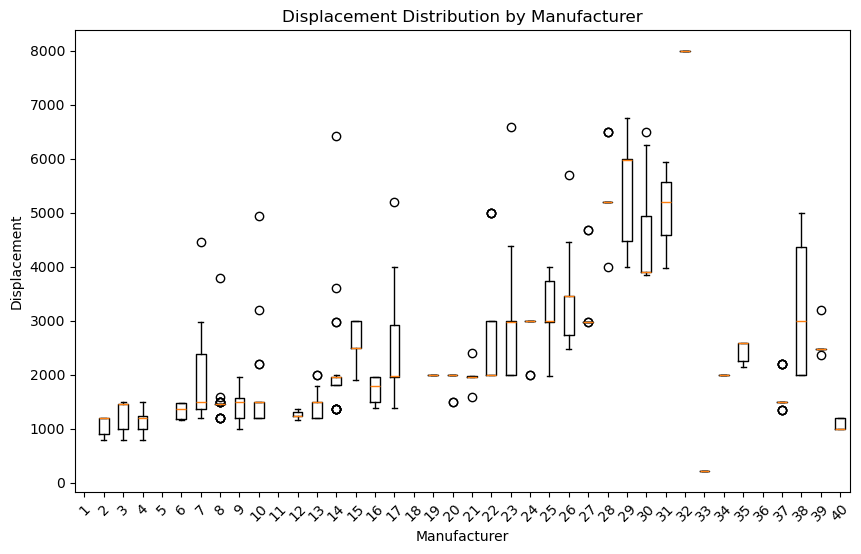

T-test between Tata and Datsun: t-statistic=nan, p-value=nan
T-test between Tata and Renault: t-statistic=nan, p-value=nan
T-test between Tata and Maruti Suzuki: t-statistic=nan, p-value=nan
T-test between Tata and Hyundai: t-statistic=nan, p-value=nan
T-test between Tata and Premier: t-statistic=nan, p-value=nan
T-test between Tata and Toyota: t-statistic=nan, p-value=nan
T-test between Tata and Nissan: t-statistic=nan, p-value=nan
T-test between Tata and Volkswagen: t-statistic=nan, p-value=nan
T-test between Tata and Ford: t-statistic=nan, p-value=nan
T-test between Tata and Mahindra: t-statistic=nan, p-value=nan
T-test between Tata and Fiat: t-statistic=nan, p-value=nan
T-test between Tata and Honda: t-statistic=nan, p-value=nan
T-test between Tata and Jeep: t-statistic=nan, p-value=nan
T-test between Tata and Isuzu: t-statistic=nan, p-value=nan
T-test between Tata and Skoda: t-statistic=nan, p-value=nan
T-test between Tata and Audi: t-statistic=nan, p-value=nan
T-test between Tata

In [47]:
#Task 12:
from scipy.stats import ttest_ind
df1 = pd.DataFrame(df)

# Group data by manufacturer and calculate statistics
grouped_data = df1.groupby('Make')[['Displacement', 'Cylinders', 'Valves_Per_Cylinder']].describe()

# Print the calculated statistics
print(grouped_data)

# Create box plots for displacement
plt.figure(figsize=(10, 6))
plt.boxplot([df1[df1['Make'] == manufacturer]['Displacement'] for manufacturer in df1['Make'].unique()])
plt.title("Displacement Distribution by Manufacturer")
plt.xlabel("Manufacturer")
plt.ylabel("Displacement")
plt.xticks(rotation=45)
plt.show()

# Perform t-tests to compare displacement between manufacturers
for i in range(len(df1['Make'].unique()) - 1):
    for j in range(i + 1, len(df1['Make'].unique())):
        manufacturer1 = df1['Make'].unique()[i]
        manufacturer2 = df1['Make'].unique()[j]
        t_stat, p_value = ttest_ind(df1[df1['Make'] == manufacturer1]['Displacement'], df1[df1['Make'] == manufacturer2]['Displacement'])
        print(f"T-test between {manufacturer1} and {manufacturer2}: t-statistic={t_stat:.3f}, p-value={p_value:.3f}")

#### Interpretation: For all the cars the different values are calculated and all the values are found out

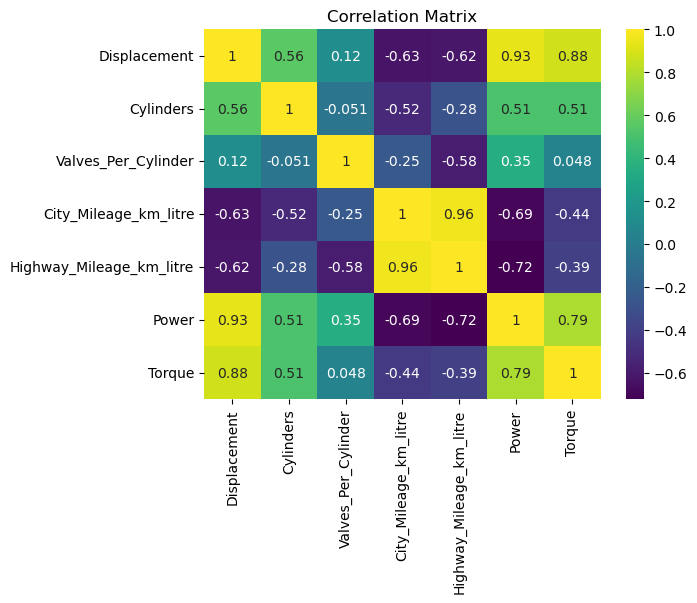

Features with significant positive correlation with city mileage:
City_Mileage_km_litre       1.000000
Highway_Mileage_km_litre    0.964067
Name: City_Mileage_km_litre, dtype: float64


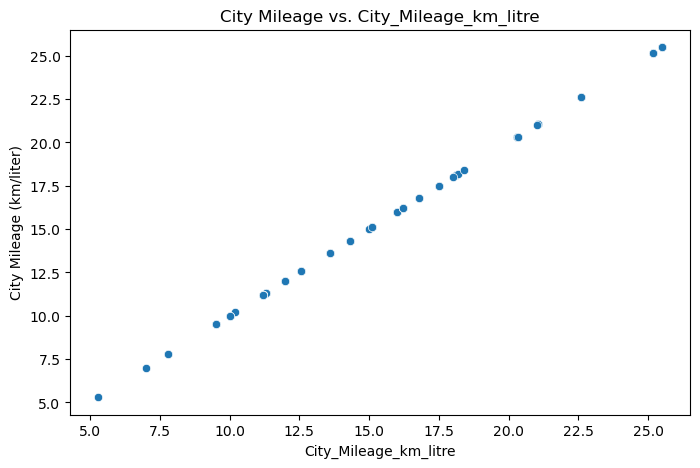

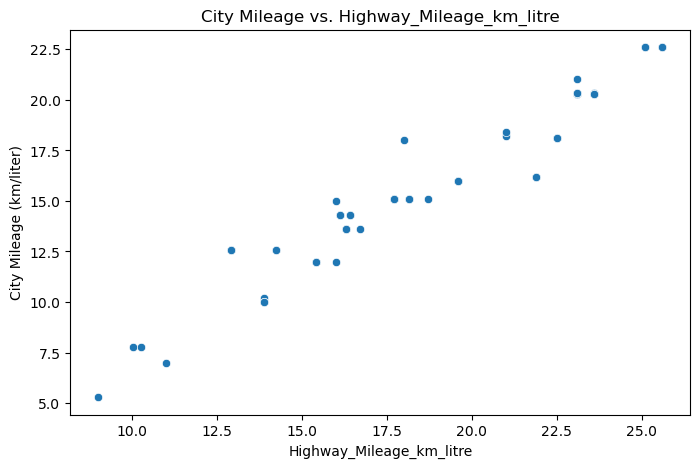

In [53]:
#Task 13:

df1 = pd.DataFrame(df)

# Filter data for the specified manufacturers
manufacturers = ['Renault', 'Toyota', 'Honda']
filtered_data = df1[df1['Make'].isin(manufacturers)]

# Calculate correlation coefficients
correlation_matrix = filtered_data[['Displacement', 'Cylinders', 'Valves_Per_Cylinder', 'City_Mileage_km_litre', 'Highway_Mileage_km_litre', 'Power', 'Torque']].corr()

# Create a heatmap to visualize correlations
sns.heatmap(correlation_matrix, annot=True, cmap='viridis')
plt.title("Correlation Matrix")
plt.show()

# Identify features with significant correlations
significant_features = correlation_matrix['City_Mileage_km_litre'][correlation_matrix['City_Mileage_km_litre'] > 0.5]
print("Features with significant positive correlation with city mileage:")
print(significant_features)

# Create scatter plots for selected features
for feature in significant_features.index:
    plt.figure(figsize=(8, 5))
    sns.scatterplot(x=filtered_data[feature], y=filtered_data['City_Mileage_km_litre'])
    plt.title(f"City Mileage vs. {feature}")
    plt.xlabel(feature)
    plt.ylabel("City Mileage (km/liter)")
    plt.show()

#### Interpretation: their is a postive coorelation between city milage anf highway milage 

In [68]:
#Task 14:

# Assuming you have your DataFrame (df) with the 'Make' column
df1 = pd.DataFrame(df)

# Convert 'Kerb_Weight' and 'Gross_Vehicle_Weight' to numeric, handling non-numeric values
df1['Kerb_Weight'] = pd.to_numeric(df1['Kerb_Weight'], errors='coerce')
df1['Gross_Vehicle_Weight'] = pd.to_numeric(df1['Gross_Vehicle_Weight'], errors='coerce')

# Calculate mean, median, standard deviation, and coefficient of variation for each manufacturer
summary_stats = df1.groupby("Make")[["Kerb_Weight", "Gross_Vehicle_Weight"]].agg(["mean", "median", "std", "var"])

# Calculate coefficient of variation
summary_stats["Kerb_Weight"]["cv"] = summary_stats["Kerb_Weight"]["std"] / summary_stats["Kerb_Weight"]["mean"]
summary_stats["Gross_Vehicle_Weight"]["cv"] = summary_stats["Gross_Vehicle_Weight"]["std"] / summary_stats["Gross_Vehicle_Weight"]["mean"]

print(summary_stats)

                 Kerb_Weight                Gross_Vehicle_Weight             \
                        mean median std var                 mean median std   
Make                                                                          
Aston Martin             NaN    NaN NaN NaN                  NaN    NaN NaN   
Audi                     NaN    NaN NaN NaN                  NaN    NaN NaN   
Bajaj                    NaN    NaN NaN NaN                  NaN    NaN NaN   
Bentley                  NaN    NaN NaN NaN                  NaN    NaN NaN   
Bmw                      NaN    NaN NaN NaN                  NaN    NaN NaN   
Bugatti                  NaN    NaN NaN NaN                  NaN    NaN NaN   
Datsun                   NaN    NaN NaN NaN                  NaN    NaN NaN   
Dc                       NaN    NaN NaN NaN                  NaN    NaN NaN   
Ferrari                  NaN    NaN NaN NaN                  NaN    NaN NaN   
Fiat                     NaN    NaN NaN NaN         

#### Interpretation: for all the manufacture the mean, meadin , std, var is calculated 